In [67]:
# ---------------------------------------------------------
# 1. Environment Setup & Auto-Reload
# ---------------------------------------------------------
# Enable the notebook to detect any changes in .py files immediately without restarting
%load_ext autoreload
%autoreload 2

import sys
import os

# ---------------------------------------------------------
# 2. Path Configuration (fixing the visibility issue)
# ---------------------------------------------------------
# Get the current path of the notebook
current_dir = os.getcwd()

# Get the main project path (go back one step)
project_root = os.path.dirname(current_dir)

# Add the main path to the working environment if not already added
if project_root not in sys.path:
    sys.path.append(project_root)

# ---------------------------------------------------------
# 3. Import Core Modules
# ---------------------------------------------------------
try:
    from src.world import WorldModel
    from src.nation import NationAgent
    import matplotlib.pyplot as plt
    
    print(f"✅ Setup Complete.")
    print(f"📂 Project Root: {project_root}")
    print("🚀 Ready to simulate.")
    
except ImportError as e:
    print(f"❌ Error: {e}")
    print("Hint: Ensure 'src' folder exists in the project root.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Setup Complete.
📂 Project Root: c:\Users\dell\projects\civilization_sim
🚀 Ready to simulate.


In [68]:
import importlib
import sys

# Reload modified files
if 'src.world' in sys.modules:
    importlib.reload(sys.modules['src.world'])
if 'src.nation' in sys.modules:
    importlib.reload(sys.modules['src.nation'])

# Re-import modules
from src.world import WorldModel
from src.nation import NationAgent

print("✅ Modules reloaded successfully!")

✅ Modules reloaded successfully!



--- Starting Simulation ---
Nation_A: Population=1000, Food=5000
Nation_B: Population=1500, Food=7000
Nation_C: Population=800, Food=4000
---------------------------


                          SIMULATION SUMMARY                          
Nation          Population      Status     Famines    Food       Wars      
----------------------------------------------------------------------
Nation_A        853             Alive      21         5852043    303       
Nation_B        55              Alive      11         5188504    305       
Nation_C        644             Alive      9          102352     300       



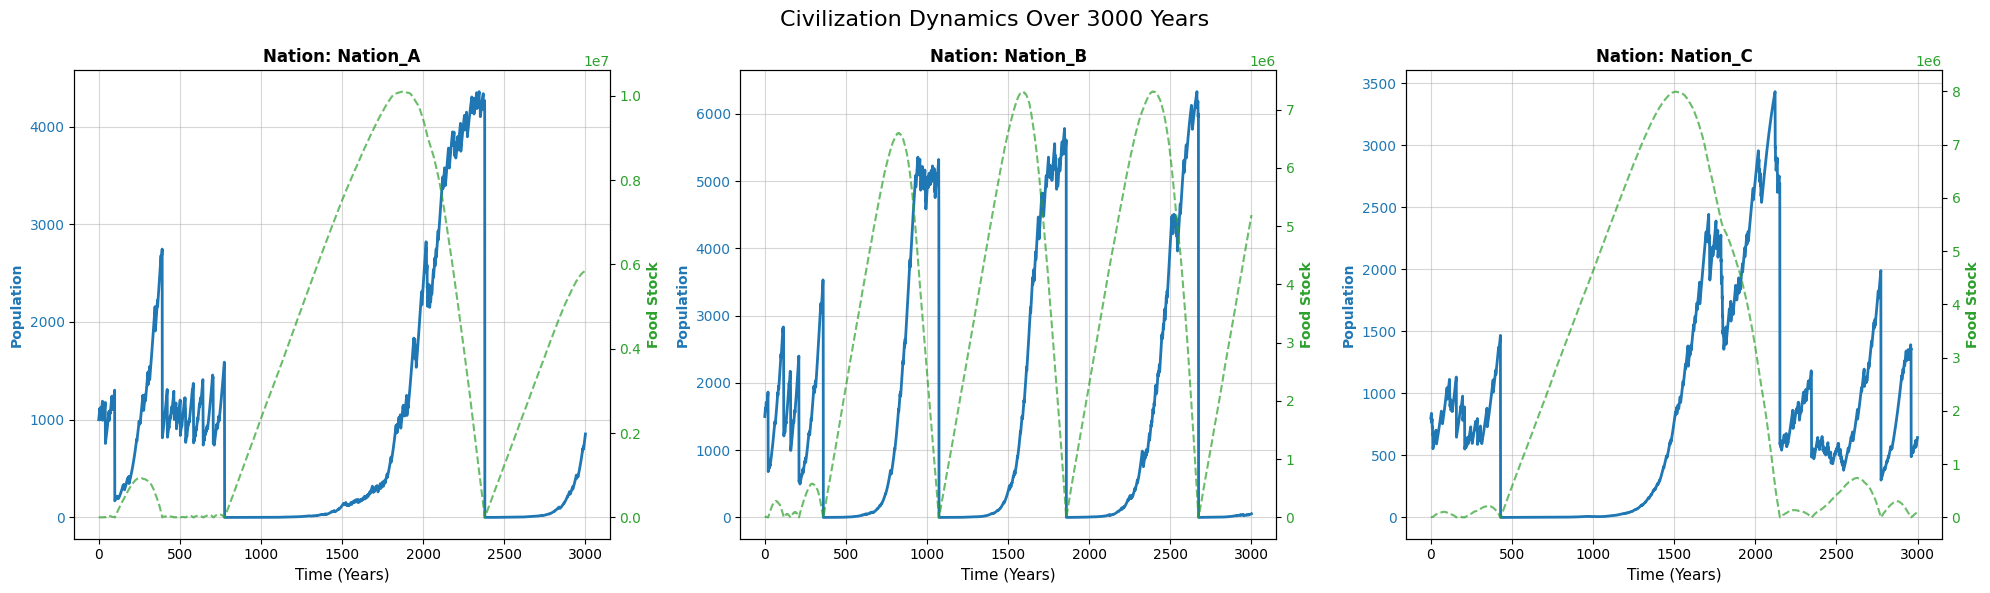

In [71]:
import matplotlib.pyplot as plt
from src.world import WorldModel

# Initialize and run the simulation
model = WorldModel()

Years = 3000

for _ in range(Years):
    model.step()

model.print_summary()
# Create visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle(f"Civilization Dynamics Over {Years} Years", fontsize=16)

for agent, ax_population in zip(model.agents, axes):
    # Plot 1: Population (left axis - blue)
    color_population = 'tab:blue'
    ax_population.set_xlabel('Time (Years)', fontsize=11)
    ax_population.set_ylabel('Population', color=color_population, fontweight='bold')
    ax_population.plot(agent.pop_history, color=color_population, linewidth=2)
    ax_population.tick_params(axis='y', labelcolor=color_population)
    ax_population.grid(True, alpha=0.5)

    # Plot 2: Food Stock (right axis - green)
    ax_food = ax_population.twinx()
    color_food = 'tab:green'
    ax_food.set_ylabel('Food Stock', color=color_food, fontweight='bold')
    ax_food.plot(agent.food_history, color=color_food, linestyle='--', alpha=0.7)
    ax_food.tick_params(axis='y', labelcolor=color_food)

    # Title for each subplot
    ax_population.set_title(f"Nation: {agent.country}", fontweight='bold')

plt.tight_layout()
plt.show()